<a href="https://colab.research.google.com/github/fbeilstein/algorithms/blob/master/introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Family of Bachmann–Landau notations**

| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Notation&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Name | Description | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Formal Definition&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Limit Definition&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |
| --- | --- | --- | --- | --- |
| $f(n) = O(g(n))$ | Big O; Big Oh; Big Omicron | $|f|$ is bounded above by $g$ (up to constant factor) asymptotically | $\exists k > 0:  \exists n_0:  \forall n>n_0:  |f(n)|\leq k g(n)$ | $\limsup_{n \to \infty} \frac{\left|f(n)\right|}{g(n)} < \infty$ |
| $f(n) = \Theta(g(n))$ | Big Theta | $f$ is bounded both above and below by $g$ asymptotically | $\exists k_1 > 0  \exists k_2>0  \exists n_0  \forall n > n_0\colon$  $k_1 \cdot g(n) \leq f(n) \leq k_2 \cdot g(n)$ | $f(n) = O(g(n)) \text{ and } f(n) = \Omega(g(n)) \text{ (Knuth version)}$ |
| $f(n) = \Omega(g(n))$ | Big Omega in complexity theory (Knuth) | $f$ is bounded below by $g$ asymptotically | $\exists k > 0  \exists n_0  \forall  n>n_0\colon   f(n) \geq k\cdot g(n)$ | $\liminf_{n \to \infty} \frac{f(n)}{g(n)} > 0 $|
| $f(n) = o(g(n))$ | Small O; Small Oh | $f$ is dominated by $g$ asymptotically | $\forall k>0  \exists n_0  \forall n > n_0\colon  |f(n)| < k\cdot g(n)$ | $\lim_{n \to \infty} \frac{\left|f(n)\right|}{g(n)} = 0$ |
| $f(n)\sim g(n)$ | On the order of | $f$ is equal to $g$ asymptotically | $\forall \varepsilon > 0 \exists n_0\forall n > n_0\colon \left| \frac{f(n)}{g(n)} - 1 \right|  < \varepsilon$ | $\lim_{n \to \infty} \frac{f(n)}{g(n)} = 1$ |
| $f(n) = \omega(g(n))$ | Small Omega | $f$ dominates $g$ asymptotically | $\forall k > 0 \exists n_0 \forall n > n_0 \colon  |f(n)| > k\cdot |g(n)|$ | $\lim_{n \to \infty} \frac{\left|f(n)\right|}{g(n)} = \infty$ |
| $f(n) = \Omega(g(n))$ | Big Omega in number theory (Hardy–Littlewood) | $|f|$ is not dominated by $g$ asymptotically | $\exists k>0 \forall n_0 \exists n > n_0\colon |f(n)| \geq k\cdot g(n)$ | $\limsup_{n \to \infty} \frac{\left|f(n)\right|}{g(n)} > 0 $ |

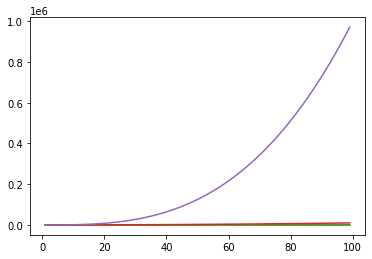

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = range(1, 100)
funcs = [lambda x: x * np.log(x), lambda x: np.log(x), lambda x: x, lambda x: np.power(x,2), lambda x: np.power(x,3)]
for f in funcs:
  plt.plot(x, f(x))

In [ ]:
def fib_rec(N):
  if N <= 1:
    return 1
  return fib_rec(N-1) + fib_rec(N-2)

%timeit fib_rec(40)

1 loop, best of 3: 35.3 s per loop


In [ ]:
def fib_iter(N):
  a, b = 1, 1
  for _ in range(N):
    a, b = b, a+b
  return a

%timeit fib_iter(1000)

10000 loops, best of 3: 71.3 µs per loop


In [ ]:
import numpy as np

def fib_matrix(N):
  M = np.array([[1,1],[1,0]])
  P = np.array([[1,0],[0,1]])
  n = 1
  while n <= N:
    if n & N: P = np.dot(P,M);
    n *= 2
    M = np.dot(M,M)
  return np.dot(P, np.array([1, 1]))[1]


%timeit fib_matrix(1000)

The slowest run took 23.93 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 29.3 µs per loop


#Problems

##Sqrt(x)

* make sure that the return value is int! read the problem.

In [ ]:
from math import sqrt

class Solution:
    def mySqrt(self, x: int) -> int:
        return int(sqrt(x))
        
obj = Solution()
obj.mySqrt(4)

2

## Ugly Number

In [ ]:
class Solution:
    def isUgly(self, n: int) -> bool:
      if not n: return False;
      for d in [2, 3, 5]:
        while not n % d: n /= d;
      return n == 1

In [ ]:
def factorize(num):
  if num == 1 : return "1"
  from sympy.ntheory import factorint
  factors = factorint(int(num))
  s = ""
  for f in factors:
    s += (str(f) + ' * ') * factors[f]
  return s[:-2]


class Solution:
    def isUgly(self, n: int) -> bool:
      if not n: return False;
      print(factorize(n))
      for d in [2, 3, 5]:
        while not n % d: n /= d;
        print("d = ", d, " factorization after cycle: ", factorize(n))
      return n == 1

obj = Solution()
print(obj.isUgly(25))
print(obj.isUgly(147))
print(obj.isUgly(16))


5 * 5 
d =  2  factorization after cycle:  5 * 5 
d =  3  factorization after cycle:  5 * 5 
d =  5  factorization after cycle:  1
True
3 * 7 * 7 
d =  2  factorization after cycle:  3 * 7 * 7 
d =  3  factorization after cycle:  7 * 7 
d =  5  factorization after cycle:  7 * 7 
False
2 * 2 * 2 * 2 
d =  2  factorization after cycle:  1
d =  3  factorization after cycle:  1
d =  5  factorization after cycle:  1
True


## Reverse Integer

In [ ]:
class Solution:
    def reverse(self, x: int) -> int:
        result = 0
        sign = 1 if x > 0 else -1
        max_result = 2**31 if sign < 0 else 2**31-1
        x = x * sign
        while x:
            if result > (max_result - x % 10) // 10:
                return 0
            result = result * 10 + x % 10
            x = x // 10
        return result * sign

In [ ]:
class Solution:
  def reverse(self, x: int) -> int:
    print("input: ", x)
    result = 0
    sign = 1 if x > 0 else -1
    max_result = 2**31 if sign < 0 else 2**31-1
    x = x * sign
    print("abs(x) = ", x, "  result = ", result)
    while x:
      if result > (max_result - x % 10) // 10:
        return 0
      result = result * 10 + x % 10
      x = x // 10
      print("abs(x) = ", x, "  result = ", result)
    print("final result: ", result * sign)
    return result * sign

obj = Solution()
obj.reverse(123)
obj.reverse(-123)
obj.reverse(12345678)

input:  123
abs(x) =  123   result =  0
abs(x) =  12   result =  3
abs(x) =  1   result =  32
abs(x) =  0   result =  321
final result:  321
input:  -123
abs(x) =  123   result =  0
abs(x) =  12   result =  3
abs(x) =  1   result =  32
abs(x) =  0   result =  321
final result:  -321
input:  12345678
abs(x) =  12345678   result =  0
abs(x) =  1234567   result =  8
abs(x) =  123456   result =  87
abs(x) =  12345   result =  876
abs(x) =  1234   result =  8765
abs(x) =  123   result =  87654
abs(x) =  12   result =  876543
abs(x) =  1   result =  8765432
abs(x) =  0   result =  87654321
final result:  87654321


87654321

## Palindrome Number

In [ ]:
class Solution:
  def isPalindrome(self, x: int) -> bool:
    if not x: return True 
    if (x < 0) or not(x % 10): return False
    result = 0
    while result < x:
      result = result * 10 + x % 10
      x = x // 10
    return result == x or result//10 == x

## Pow(x, n)

![](https://assets.leetcode.com/users/images/be69a84b-6dd6-4982-a02f-bed5f15ecd87_1613954741.2457345.png)

In [ ]:
class Solution:
  def myPow(self, x: float, n: int) -> float:
    if n < 0:
      n = -n
      x = 1.0 / x
    result = 1.0
    while n:
      if n % 2:
        result *= x
      x = x * x
      n = n // 2
    return result

In [ ]:
bin(25)

'0b11001'

In [21]:
def visuals(n, temp, accum, x_n, x_temp, x_a):
  n_bits = list(bin(n))[2:]
  t_bits = list(bin(temp))[2:]
  t_bits = [" "] * (len(n_bits) - len(t_bits)) + t_bits 
  a_bits = list(bin(accum))[2:]
  a_bits = [" "] * (len(n_bits) - len(a_bits)) + a_bits 
  
  result = "<table>\n"
  result += "<tr>\n"
  result += "<td>n = </td><td>" + "</td><td>".join(n_bits) + "</td>"
  result += "<td>x<sup>n</sup>=</td><td>" + str(x_n) + "</td>\n"
  result += "</tr><tr>\n"
  result += "<td>k = </td><td>" + "</td><td>".join(t_bits) + "</td>"
  result += "<td>x<sup>k</sup>=</td><td>" + str(x_temp) + "</td>\n"
  result += "</tr><tr>\n"
  result += "<td>m = </td><td>" + "</td><td>".join(a_bits) + "</td>"
  result += "<td>x<sup>m</sup>=</td><td>" + str(x_a) + "</td>\n"
  result += "</tr>\n"
  result += "</table>"
  
  import IPython
  from google.colab import output
  display(IPython.display.HTML(result))

x = 5
n = 123
temp = 1
temp_x = x
accum_x = 1
accum = 0
while temp <= n:
  if temp & n:
    accum_x *= temp_x
    accum += temp
  visuals(n, temp, accum, x**n, temp_x, accum_x)
  temp_x *= temp_x
  temp *= 2

n =,1,1,1,1,0,1,1,xn=,94039548065783000637498922977779654225493244541767001720700136502273380756378173828125
k =,,,,,,,1,xk=,5
m =,,,,,,,1,xm=,5


n =,1,1,1,1,0,1,1,xn=,94039548065783000637498922977779654225493244541767001720700136502273380756378173828125
k =,,,,,,1,0,xk=,25
m =,,,,,,1,1,xm=,125


n =,1,1,1,1,0,1,1,xn=,94039548065783000637498922977779654225493244541767001720700136502273380756378173828125
k =,,,,,1,0,0,xk=,625
m =,,,,,,1,1,xm=,125


n =,1,1,1,1,0,1,1,xn=,94039548065783000637498922977779654225493244541767001720700136502273380756378173828125
k =,,,,1,0,0,0,xk=,390625
m =,,,,1,0,1,1,xm=,48828125


n =,1,1,1,1,0,1,1,xn=,94039548065783000637498922977779654225493244541767001720700136502273380756378173828125
k =,,,1,0,0,0,0,xk=,152587890625
m =,,,1,1,0,1,1,xm=,7450580596923828125


n =,1,1,1,1,0,1,1,xn=,94039548065783000637498922977779654225493244541767001720700136502273380756378173828125
k =,,1,0,0,0,0,0,xk=,23283064365386962890625
m =,,1,1,1,0,1,1,xm=,173472347597680709441192448139190673828125


n =,1,1,1,1,0,1,1,xn=,94039548065783000637498922977779654225493244541767001720700136502273380756378173828125
k =,1,0,0,0,0,0,0,xk=,542101086242752217003726400434970855712890625
m =,1,1,1,1,0,1,1,xm=,94039548065783000637498922977779654225493244541767001720700136502273380756378173828125
